In [1]:
import glob, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import seaborn as sns
from sklearn.decomposition import PCA
import collections
sns.set_style( "white" )

plt.rcParams[ "font.size" ] = 4.0
plt.rcParams[ "figure.dpi" ] = 100
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.labelsize'] = 6 
plt.rcParams[ "figure.figsize" ] = ( 2*0.8,2.75*0.8 )
plt.rcParams[ "font.serif" ] = 'Arial'

#% matplotlib inline

In [2]:
###quantile normalize
def qn(df_input):
    df = df_input.copy()
    #compute rank
    dic = {}
    for col in df:
        dic.update({col : sorted(df[col])})
    sorted_df = pd.DataFrame(dic)
    rank = sorted_df.mean(axis = 1).tolist()
    #sort
    for col in df:
        t = np.searchsorted(np.sort(df[col]), df[col])
        df[col] = [rank[i] for i in t]
    return df

In [3]:
f = 'TPM.PC.txt'
df = pd.read_table(f,index_col=0)
df_log = np.log2(df+1) ##log2 transform
df_log.to_csv('TPM_log.PC.txt',sep='\t')

In [4]:
df_log_qn = qn(df_log) #quantile normalize
df_log_qn.to_csv('TPM_log_qn.txt',sep='\t')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

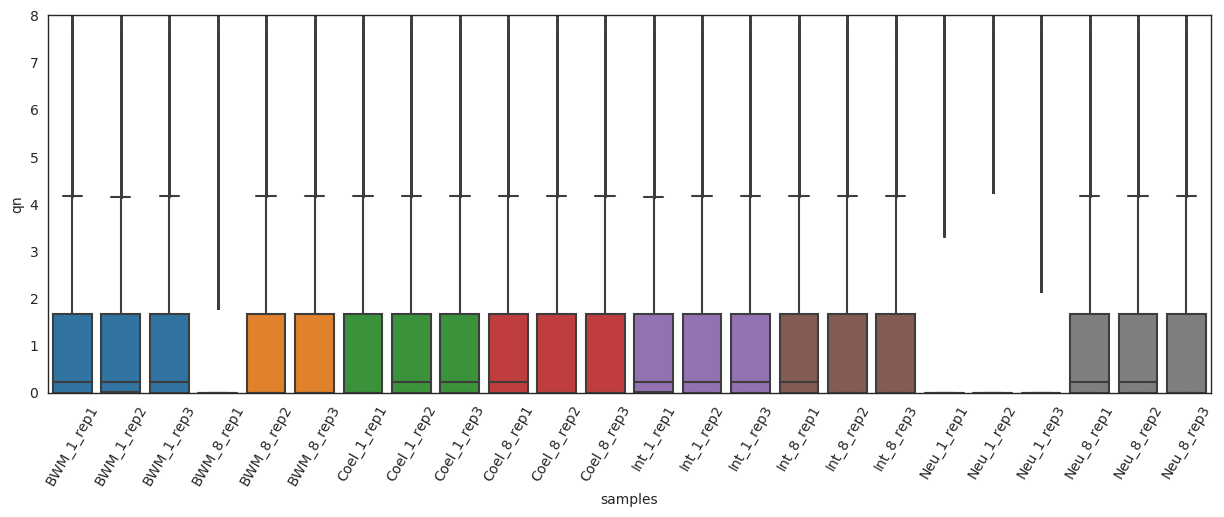

In [7]:
#boxplot
df_log_qn_plot = pd.melt( df_log_qn, value_vars=df.columns.tolist(),var_name='samples', value_name='qn')
c2 = sns.color_palette()[:8] #num of sample type
c2 = [c for c in c2 for i in range(3)] #num of replicates
plt.rcParams[ "figure.dpi" ] = 100
plt.rcParams[ "figure.figsize" ] = ( 15,5 )
plt.rcParams[ "font.size" ] = 4.0
plt.rcParams['axes.labelsize'] = 10
sns.boxplot(y='qn',x='samples',data=df_log_qn_plot,fliersize=1,palette=c2)
plt.ylim(0,8)
plt.yticks(size=10)
plt.xticks(rotation=60,size=10)
plt.savefig('qn_boxplot.pdf')

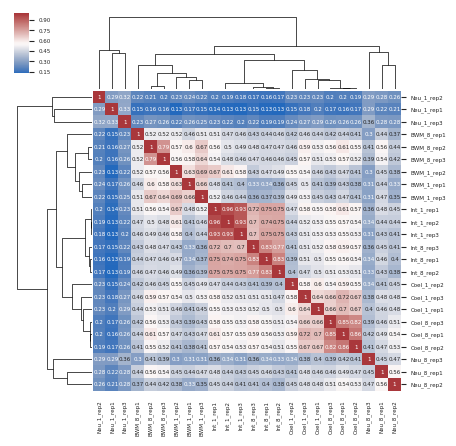

In [21]:
#PCC 
df_log_qn_cor = df_log_qn.corr()
plt.rcParams[ "font.size" ] = 4.0
plt.rcParams['axes.labelsize'] = 20
sns.clustermap(df_log_qn_cor,
                    method='average', metric ='correlation',
                    annot=True,
                    #center=0., 
                    cmap="vlag",
                    #vmin=0.,vmax=1,
                    #linewidths=.1,
                    figsize=(5,5)
                    )
plt.savefig('qn_correlation.pdf')

In [11]:
#PCA
pca = PCA(n_components=2)
pca_mat=pca.fit_transform(df_log_qn.T)
samples = df_log_qn.columns
group = collections.defaultdict(dict)
group_keys = []
for s in samples:
    g = s.split('_rep')[0]
    group[s] = g
    if g not in group_keys:
        group_keys.append(g)
colors = sns.color_palette()[:8]
colors = dict(zip(group_keys, colors))

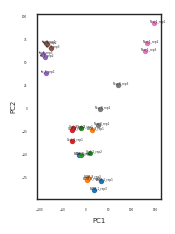

In [15]:
plt.rcParams[ "figure.figsize" ] = ( 2*0.8,2.75*0.8 )
data = zip(samples, pca_mat)
plt.rcParams[ "font.size" ] = 2.0
for ele in data:
    s = ele[0]
    x = ele[1][0]; y=ele[1][1]
    color = colors[group[s]]
    plt.scatter(x,y, color=color,label=s,marker = 'o', s=8)
    plt.annotate(s, (x-10,y))
plt.xlabel('PC1',size=5)
plt.ylabel('PC2',size=5)
plt.tight_layout()
#plt.legend(loc='best')
plt.savefig('qn_PCA.pdf')